# Clone the repo
### (For use in colab)
[![Open in Colaboratory](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/rizerphe/dev_datasets_analysis_project/blob/main/notebook.ipynb)

In [ ]:
!git clone --recursive https://github.com/rizerphe/dev_datasets_analysis_project.git
%cd dev_datasets_analysis_project
!python download_stackoverflow.py

# Ukraine 2021

## Load the dataset

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
# Load the data

dec_2021 = pd.read_csv('./csv/salaries/2021_dec_raw.csv', delimiter=';')
dec_2021_devs = dec_2021[dec_2021['Оберіть вашу посаду'] == 'Software Engineer (Junior, Middle, Senior, Team/Tech Lead, Architect)']
dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].astype(int)
dec_2021_devs = dec_2021_devs.dropna(subset=['Зарплата у $$$ за місяць, лише ставка після сплати податків'])

/tmp/ipykernel_227696/3266199665.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'] = dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].astype(int)


In [24]:
dec_2021_devs

,Timestamp,Ви працюєте зараз в ІТ?,Де ви мешкаєте?,Де ви працюєте?,Ваша стать,Ваш вік,Яка у вас освіта?,Чи є у вас науковий ступінь?,Знання англійської мови,Оберіть вашу посаду,...,Тип компанії,Кількість спеціалістів у вашій компанії (в Україні),Загальний стаж роботи в ІТ,Загальний стаж роботи за спеціальністю,У скількох компаніях встигли попрацювати за час ІТ-кар'єри?,"Зарплата у $$$ за місяць, лише ставка після сплати податків",Наскільки змінилась ваша зарплата за останні 12 місяців?,"Ставка у $$$ за годину, яку ви виставляєте клієнтам",Чи отримуєте ви грошові бонуси до зарплати?,Вкажіть суму цього бонуса у $$$ після податків
6187,11/30/2021 16:50:41,"Так, працюю full-time",Дніпро,Віддалено,Чоловік,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутстафінгова,до 1000,10 і більше років,10 і більше років,5–7,18000,5600,NaN,"Отримую бонус за гарні показники роботи, але н...",NaN
6188,11/29/2021 12:20:22,"Так, працюю full-time",Львів,"Частково віддалено, частково в офісі",Чоловік,29,"Вища (бакалавр, спеціаліст, магістр)",Доктор наук,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутсорсингова,понад 1000,10 і більше років,5 років,5–7,16800,2400,145,"Ні, не отримую",NaN
6189,11/30/2021 11:36:42,"Так, працюю full-time",Львів,"Частково віддалено, частково в офісі",Чоловік,33,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 50,10 і більше років,10 і більше років,5–7,15250,9250,NaN,"Отримую бонус за гарні показники роботи, але н...",2500
6190,12.05.2021 19:37,"Так, працюю full-time",Харків,Віддалено,Чоловік,35,"Вища (бакалавр, спеціаліст, магістр)",Немає,Upper-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутсорсингова,до 1000,8 років,4 роки,8 і більше,15000,5000,NaN,Отримую бонус щомісяця,2000
6191,11/29/2021 11:00:54,"Так, працюю full-time",Київ,Віддалено,Чоловік,34,"Вища (бакалавр, спеціаліст, магістр)",Немає,Advanced,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 50,10 і більше років,10 і більше років,NaN,14300,5530,55,"Ні, не отримую",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14187,12/15/2021 11:35:02,"Так, працюю full-time",Вінниця,В офісі,Жінка,20,Ще студент вишу,Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Аутстафінгова,до 200,Пів року,Пів року,1,100,any changes,NaN,"Ні, не отримую",NaN
14188,12.12.2021 17:30,"Так, працюю full-time",Вінниця,В офісі,Чоловік,25,"Вища (бакалавр, спеціаліст, магістр)",Немає,Pre-Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Продуктова,до 200,Менше як 3 місяці,Пів року,2,100,100,NaN,"Ні, не отримую",NaN
14189,12/15/2021 15:14:29,"Так, працюю full-time",Київ,Віддалено,Чоловік,35,"Вища (бакалавр, спеціаліст, магістр)",Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Стартап,Лише я,Менше як 3 місяці,Менше як 3 місяці,1,100,10,1,"Ні, не отримую",0
14190,12/16/2021 16:12:48,"Так, працюю full-time",Київ,Віддалено,Чоловік,18,Середня спеціальна,Немає,Intermediate,"Software Engineer (Junior, Middle, Senior, Tea...",...,Стартап,до 10 спеціалістів,Пів року,Пів року,1,100,0,NaN,"Отримую бонус за гарні показники роботи, але н...",50


## Look at average salaries (in USD) + for different regions

In [25]:
dec_2021_devs['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median()

3300.0

In [26]:
# Salary depending on region
dec_2021_devs.set_index('Де ви мешкаєте?').groupby('Де ви мешкаєте?')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median().sort_values(ascending=False)

Де ви мешкаєте?
Київ                3800.0
Львів               3500.0
Одеса               3300.0
Дніпро              3200.0
Харків              3100.0
Івано-Франківськ    3000.0
Вінниця             3000.0
Чернігів            2800.0
Суми                2675.0
Ужгород             2600.0
Черкаси             2600.0
Миколаїв            2560.0
Маріуполь           2550.0
Рівне               2500.0
Тернопіль           2500.0
Херсон              2500.0
Запоріжжя           2470.0
Полтава             2400.0
Хмельницький        2400.0
Луцьк               2350.0
Чернівці            2300.0
Інше                2275.0
Житомир             2100.0
Кривий Ріг          2020.0
Кропивницький       1600.0
Name: Зарплата у $$$ за місяць, лише ставка після сплати податків, dtype: float64

## Look at distribution of work style and experience

In [27]:
dec_2021_devs['Де ви працюєте?'].value_counts()

Віддалено                               4709
Частково віддалено, частково в офісі    2190
В офісі                                  982
Name: Де ви працюєте?, dtype: int64

In [28]:
dec_2021_devs['Загальний стаж роботи в ІТ'].value_counts()

10 і більше років    1700
3 роки                870
5 років               869
4 роки                776
6 років               690
2 роки                605
7 років               522
1 рік                 408
8 років               404
1,5 року              338
Пів року              321
9 років               318
Менше як 3 місяці      94
3 місяці               90
Name: Загальний стаж роботи в ІТ, dtype: int64

## Graphs: average salary and experience

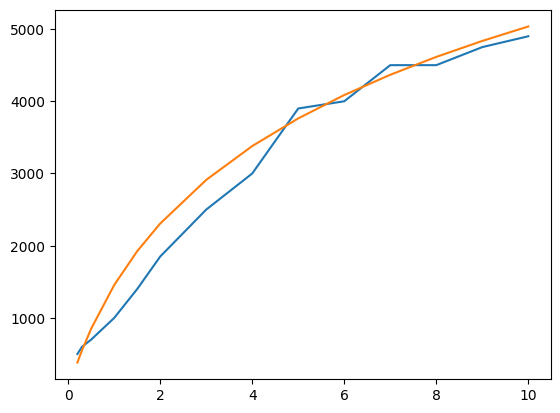

In [29]:
data = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median().sort_values()

index = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))

sub = plt.subplot()
sub.plot(index, data)
sub.plot(index, [2100 * math.log(x + 1) for x in index])

## Graphs: average salary based on experience; sorted by criteria

### Setup

In [30]:
def sort_by_criteria(criteria, threshold=None):
    index = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))
    index_names = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median().sort_values().index
    index_dict = dict(zip(index_names, index))


    for key in sorted(dec_2021_devs[criteria].unique(), reverse=True, key=lambda key: sum(dec_2021_devs[criteria] == key)):
        data = dec_2021_devs[dec_2021_devs[criteria] == key].groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median()

        n = sum(dec_2021_devs[criteria] == key)
        print(f"{key} - {n} responses")

        if threshold is None or n > threshold:
            sub = plt.subplot()
            sorted_index = sorted(data.index, key=lambda x: index_dict[x])
            sub.plot(sorted(index_dict[x] for x in data.index), [data[x] for x in sorted_index])
            sub.plot(index, [2100 * math.log(x + 1) for x in index])
            plt.show()

### Location

Київ - 3376 responses


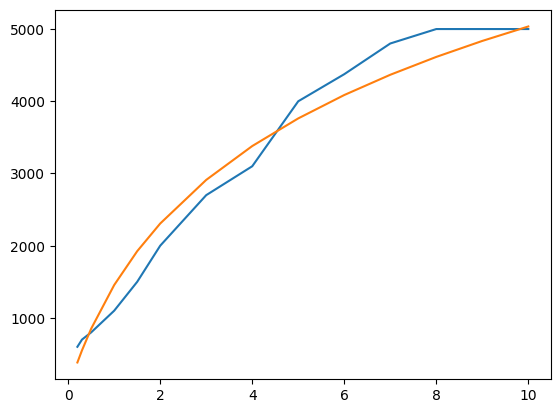

Львів - 1133 responses


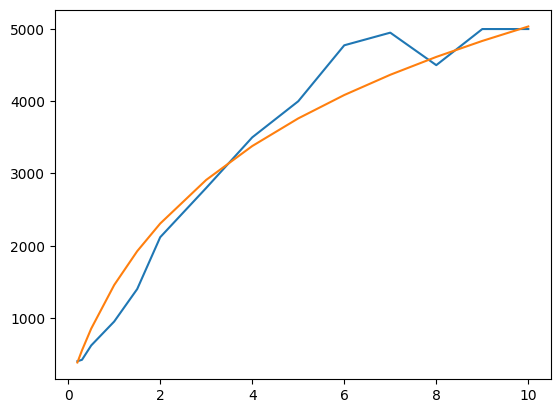

Харків - 1039 responses


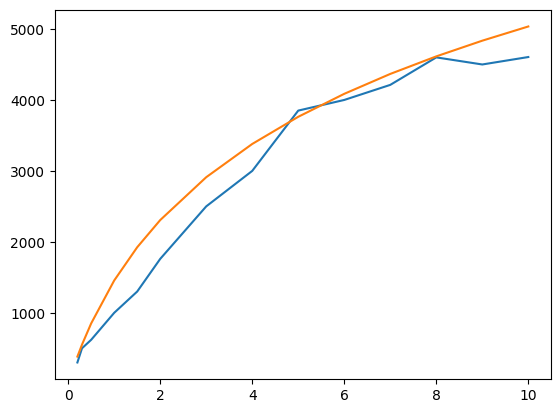

Дніпро - 449 responses


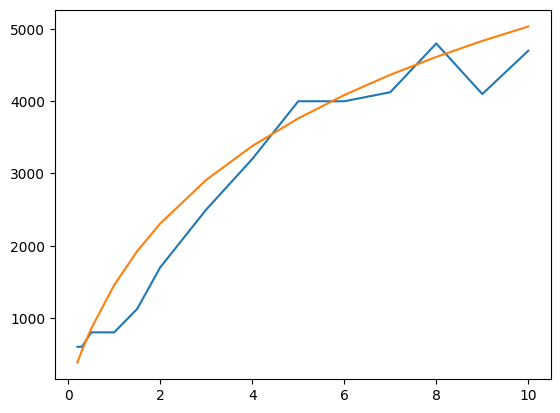

Одеса - 410 responses


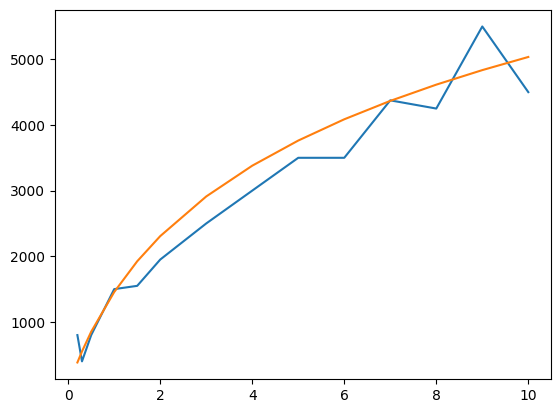

Вінниця - 233 responses
Інше - 218 responses
Івано-Франківськ - 163 responses
Запоріжжя - 105 responses
Чернівці - 103 responses
Тернопіль - 88 responses
Черкаси - 79 responses
Хмельницький - 76 responses
Миколаїв - 74 responses
Рівне - 60 responses
Полтава - 54 responses
Житомир - 53 responses
Суми - 50 responses
Чернігів - 49 responses
Луцьк - 46 responses
Ужгород - 41 responses
Херсон - 35 responses
Кропивницький - 33 responses
Кривий Ріг - 20 responses
Маріуполь - 18 responses


In [31]:
sort_by_criteria("Де ви мешкаєте?", 300)

### Language

JavaScript - 1541 responses


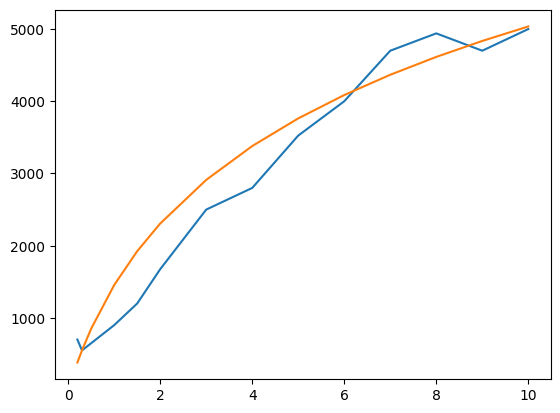

C# / .NET - 1225 responses


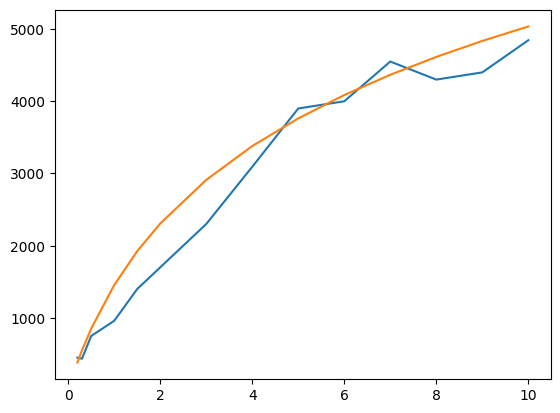

Java - 1191 responses


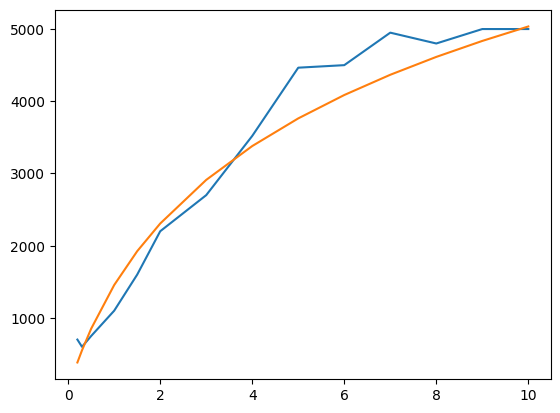

TypeScript - 868 responses


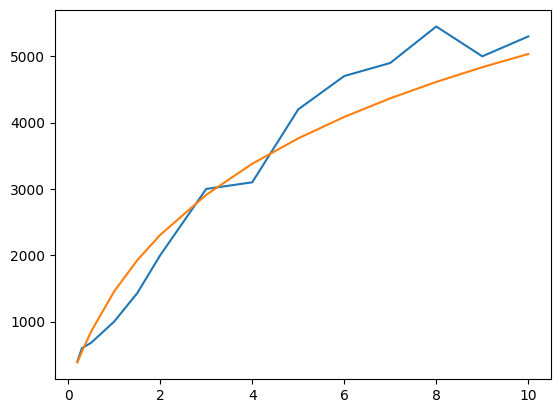

PHP - 867 responses


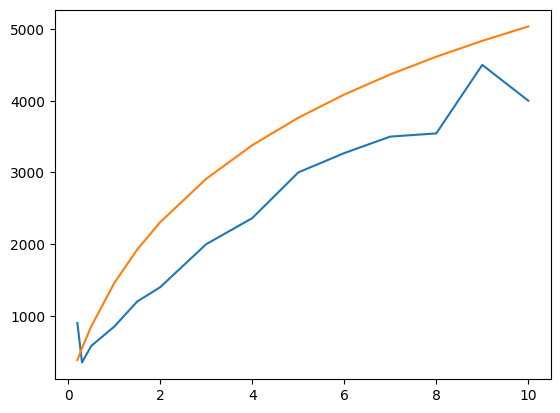

Python - 481 responses


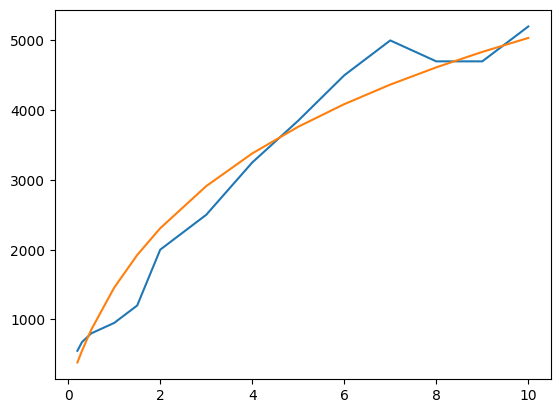

Kotlin - 287 responses
Swift - 284 responses
C++ - 274 responses
Ruby - 167 responses
Go - 151 responses
Dart - 86 responses
C - 78 responses
Scala - 66 responses
1С - 56 responses
Salesforce Apex - 53 responses
SQL - 46 responses
Інша мова - 34 responses
Мови розробки БД (PL/SQL, Transact-SQL) - 23 responses
Objective-C - 18 responses
Rust - 17 responses
Elixir - 11 responses
Не можу обрати одну основну мову - 10 responses
Clojure - 10 responses
Erlang - 8 responses
ABAP - 7 responses
Pascal/Delphi - 7 responses
Perl - 5 responses
Groovy - 5 responses
APL - 4 responses
Haskell - 3 responses
nan - 0 responses


In [32]:
sort_by_criteria("Основна мова програмування", 300)

# Ukraine 2022

### Loading dataset for june 2022

In [33]:
# Load data about june 2022

june_2022 = pd.read_csv('./csv/salaries/2022_june_dev.csv', delimiter=',')
june_2022['salary'] = june_2022['salary'].astype(int)
june_2022 = june_2022.dropna(subset=['salary'])

### Середня зарплата у 2022 році (червень)

In [34]:
june_2022['salary'].median()

3500.0

In [35]:
# Salary depending on region

june_2022.set_index('city').groupby('city')['salary'].median().sort_values(ascending=False)

city
Київ                3800.0
Львів               3750.0
Інше                3500.0
Вінниця             3260.0
Івано-Франківськ    3200.0
Дніпро              3200.0
Одеса               3200.0
Харків              2700.0
Name: salary, dtype: float64

In [36]:
june_2022['experience'].value_counts()

від 1 до 3 років     1984
від 4 до 6 років     1756
від 7 до 10 років    1089
понад 10 років        539
до року               433
Name: experience, dtype: int64

## Graphs: average salary based on experience

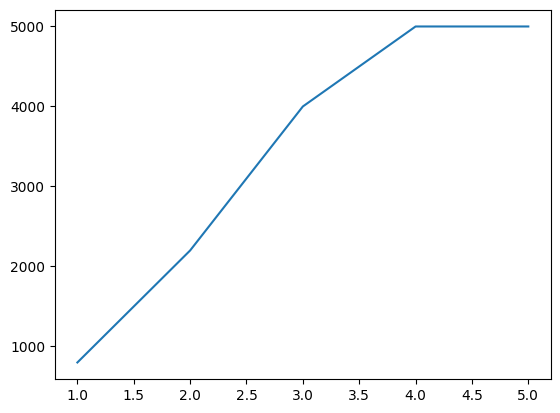

In [37]:
data_2022 = june_2022.groupby('experience')['salary'].median().sort_values()

index_2022 = list(range(1, 6))
sub = plt.subplot()
sub.plot(index_2022, data_2022)

## Graphs: average salary based on experience; sorted by criteria

### Setup

In [38]:
def sort_by_criteria_2022(criteria, threshold=None):
    index_new = [0.5, 1, 4, 7, 10]
    index_names_2022 = june_2022.groupby('experience')['salary'].median().sort_values().index
    index_dict_2022 = dict(zip(index_names_2022, index_new))

    for key in sorted(june_2022[criteria].unique(), reverse=True, key=lambda key: sum(june_2022[criteria] == key)):
        data_2022 = june_2022[june_2022[criteria] == key].groupby('experience')['salary'].median()

        n = sum(june_2022[criteria] == key)
        print(f"{key} - {n} responses")

        if threshold is None or n > threshold:
            sub = plt.subplot()
            sorted_index = sorted(data_2022.index, key=lambda x: index_dict_2022[x])
            sub.plot(sorted(index_dict_2022[x] for x in data_2022.index), [data_2022[x] for x in sorted_index])
            plt.show()

### Location

Інше - 1895 responses


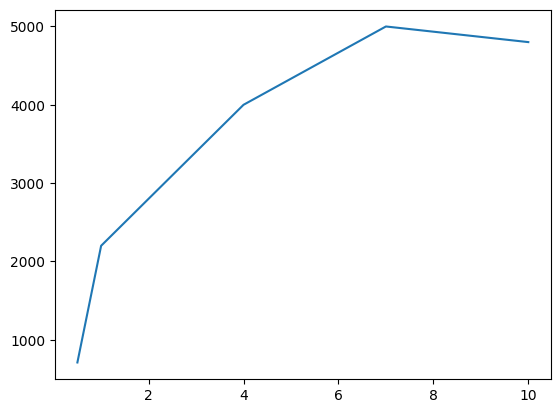

Київ - 1395 responses


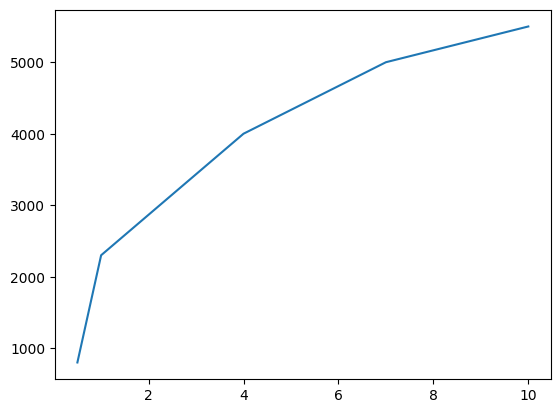

Львів - 1152 responses


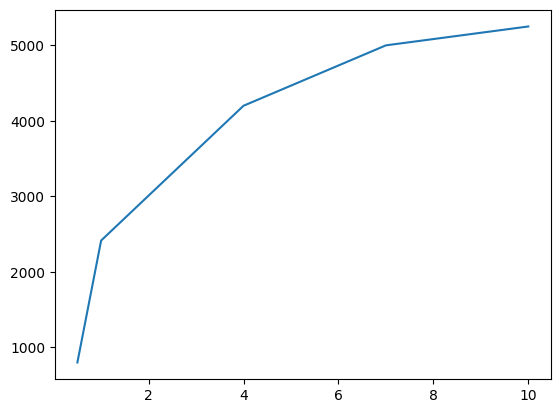

Дніпро - 334 responses


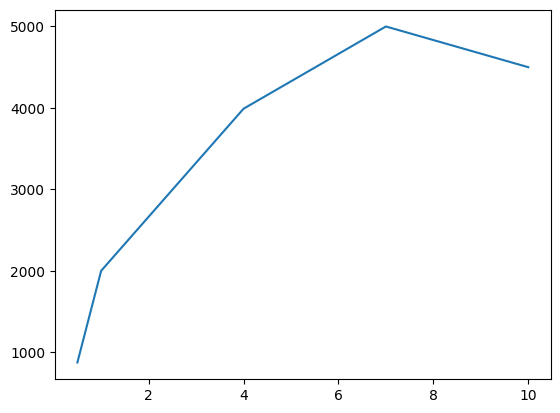

Івано-Франківськ - 332 responses


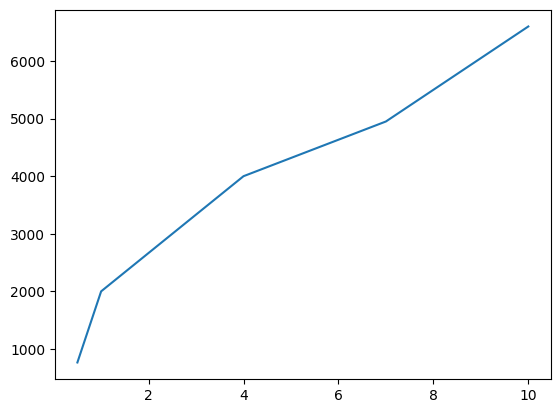

Вінниця - 322 responses


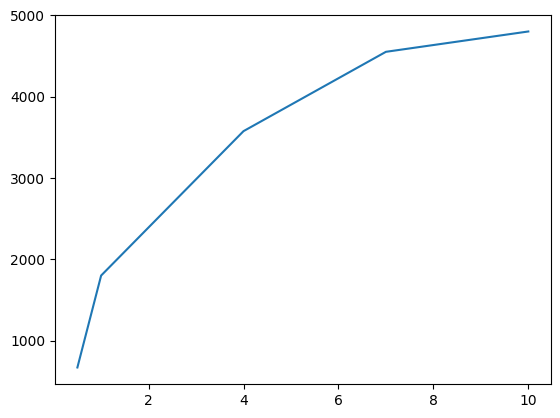

Одеса - 227 responses


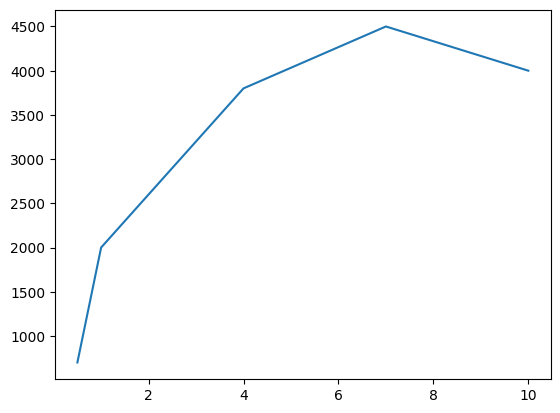

Харків - 144 responses


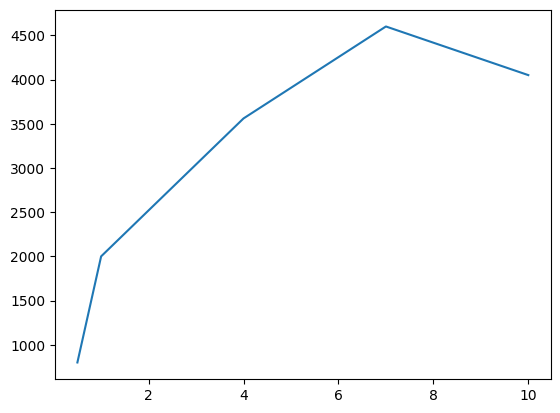

In [39]:
sort_by_criteria_2022("city", 100)

### Language

JavaScript - 1032 responses


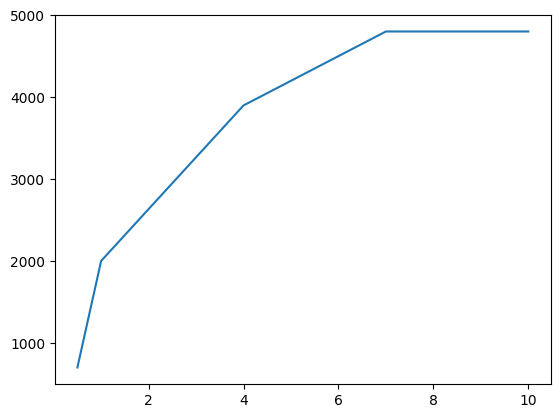

C#/.NET - 848 responses


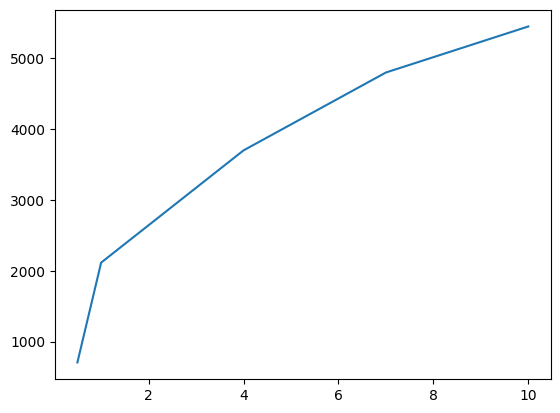

Java - 832 responses


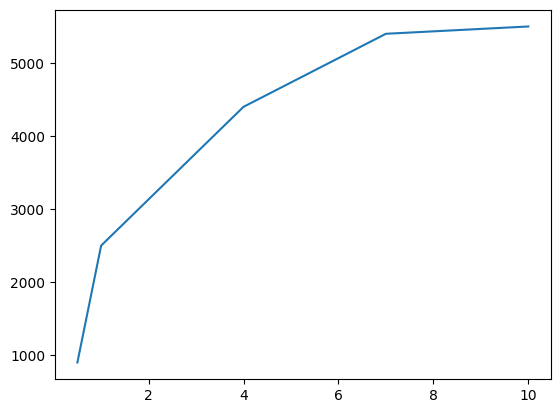

TypeScript - 719 responses


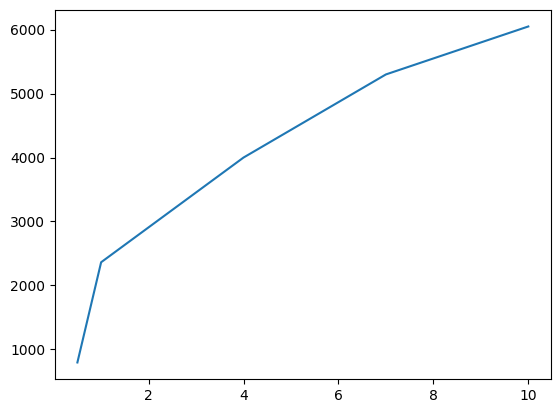

PHP - 538 responses


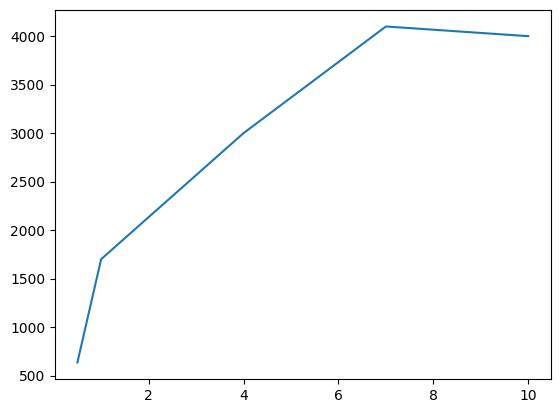

Інша - 519 responses


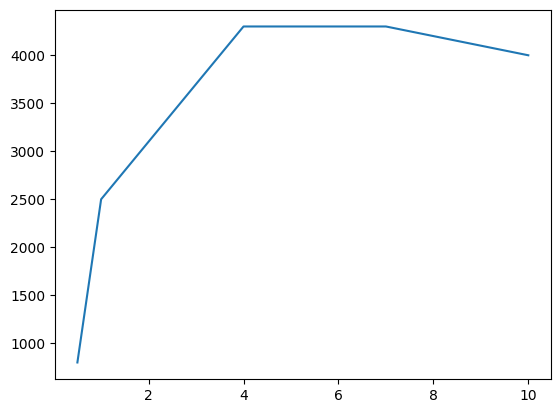

Python - 395 responses


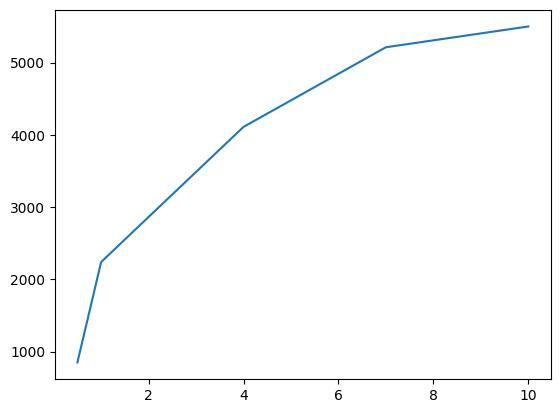

Kotlin - 254 responses


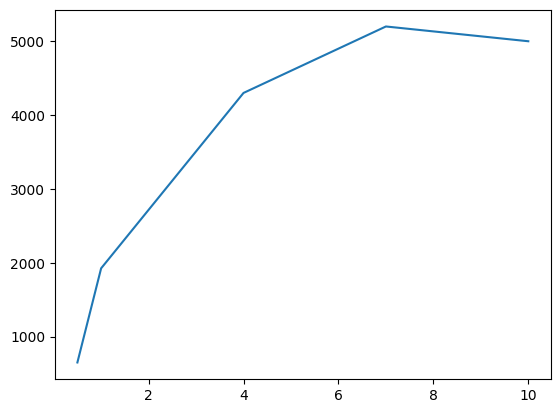

Swift - 226 responses


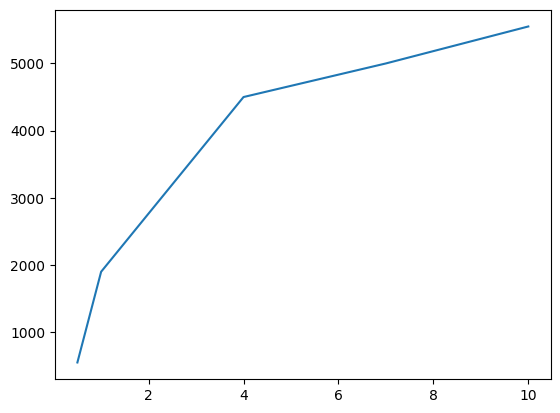

C++ - 201 responses


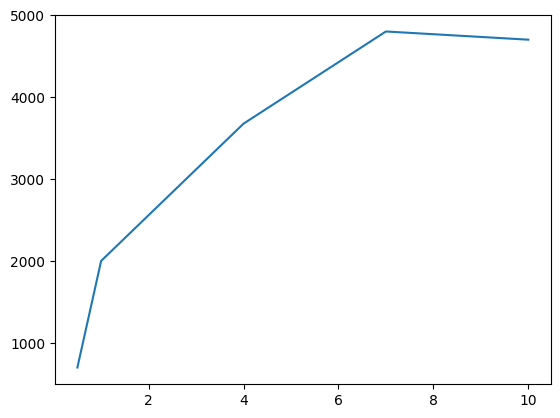

Ruby - 163 responses


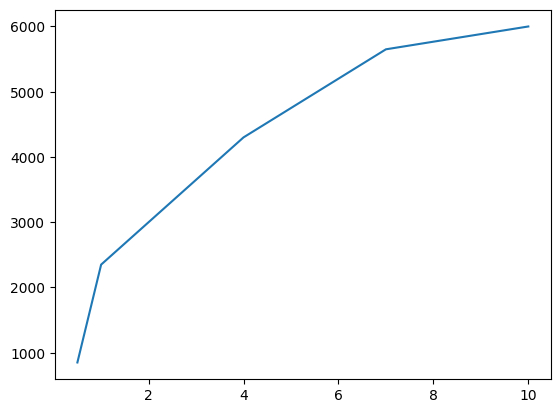

C - 60 responses
Objective-C - 8 responses
Clojure - 6 responses


In [40]:
sort_by_criteria_2022("tech", 100)

## Graphs: Comparison

### Setup

In [41]:
def sort_by_criteria_both(criteria1, criteria2, threshold=None):
    index_2021 = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))
    index_names_2021 = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median().sort_values().index
    index_dict_2021 = dict(zip(index_names_2021, index_2021))
    index_2022 = [0.5, 1, 4, 7, 10]
    index_names_2022 = june_2022.dropna(subset=[criteria2]).groupby('experience')['salary'].median().sort_values().index
    index_dict_2022 = dict(zip(index_names_2022, index_2022))



    for key in sorted(dec_2021_devs[criteria1].unique(), reverse=True, key=lambda key: sum(dec_2021_devs[criteria1] == key)):
        data_2021 = dec_2021_devs[dec_2021_devs[criteria1] == key].groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].mean()
        data_2022 = june_2022[june_2022[criteria2] == key].groupby('experience')['salary'].median()

        n_2021 = sum(dec_2021_devs[criteria1] == key)
        if n_2021 != 0:
            print(f"{key} - {n_2021} responses (2021)")

        n_2022 = sum(june_2022[criteria2] == key)
        if n_2022 != 0:
            print(f"{key} - {n_2022} responses (2022)")

        if threshold is None or (n_2021 > threshold and n_2022 > threshold):
            sub = plt.subplot()

            sorted_index_2021 = sorted(data_2021.index, key=lambda x: index_dict_2021[x])
            sub.plot(sorted(index_dict_2021[x] for x in data_2021.index), [data_2021[x] for x in sorted_index_2021])

            sorted_index_2022 = sorted(data_2022.index, key=lambda x: index_dict_2022[x])
            sub.plot(sorted(index_dict_2022[x] for x in data_2022.index), [data_2022[x] for x in sorted_index_2022])
            plt.show()

### Location

Київ - 3376 responses (2021)
Київ - 1395 responses (2022)


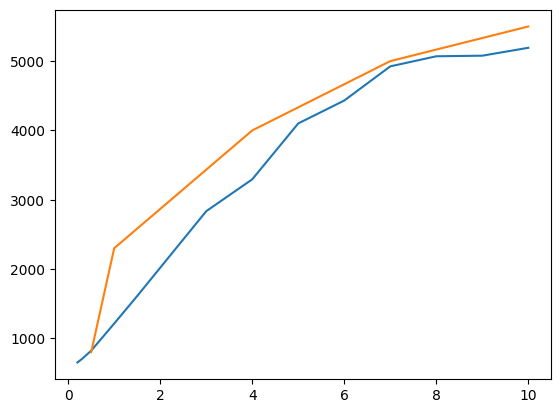

Львів - 1133 responses (2021)
Львів - 1152 responses (2022)


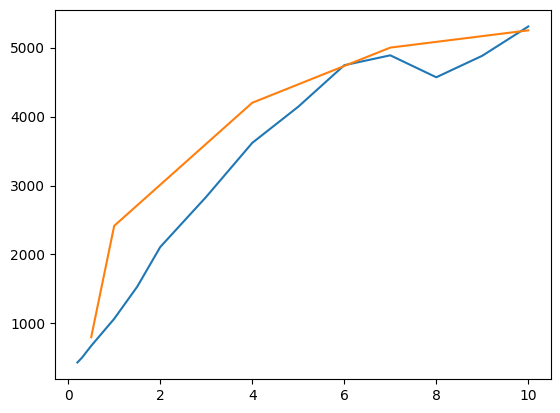

Харків - 1039 responses (2021)
Харків - 144 responses (2022)
Дніпро - 449 responses (2021)
Дніпро - 334 responses (2022)


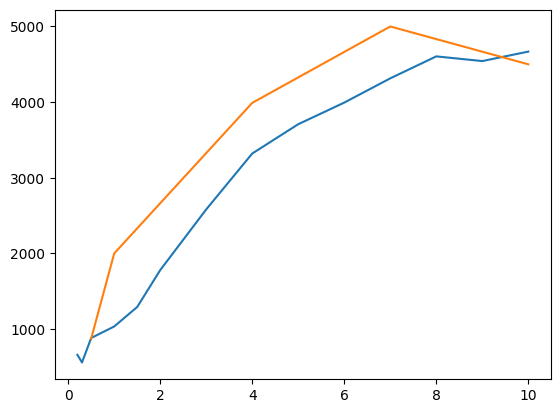

Одеса - 410 responses (2021)
Одеса - 227 responses (2022)
Вінниця - 233 responses (2021)
Вінниця - 322 responses (2022)
Інше - 218 responses (2021)
Інше - 1895 responses (2022)
Івано-Франківськ - 163 responses (2021)
Івано-Франківськ - 332 responses (2022)
Запоріжжя - 105 responses (2021)
Чернівці - 103 responses (2021)
Тернопіль - 88 responses (2021)
Черкаси - 79 responses (2021)
Хмельницький - 76 responses (2021)
Миколаїв - 74 responses (2021)
Рівне - 60 responses (2021)
Полтава - 54 responses (2021)
Житомир - 53 responses (2021)
Суми - 50 responses (2021)
Чернігів - 49 responses (2021)
Луцьк - 46 responses (2021)
Ужгород - 41 responses (2021)
Херсон - 35 responses (2021)
Кропивницький - 33 responses (2021)
Кривий Ріг - 20 responses (2021)
Маріуполь - 18 responses (2021)


In [42]:
sort_by_criteria_both('Де ви мешкаєте?', "city", 300)

### Language

JavaScript - 1541 responses (2021)
JavaScript - 1032 responses (2022)


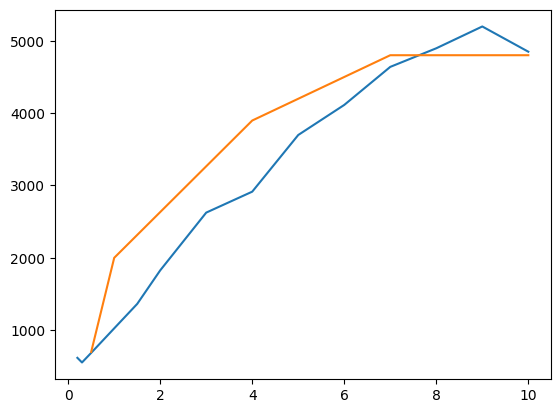

C# / .NET - 1225 responses (2021)
Java - 1191 responses (2021)
Java - 832 responses (2022)


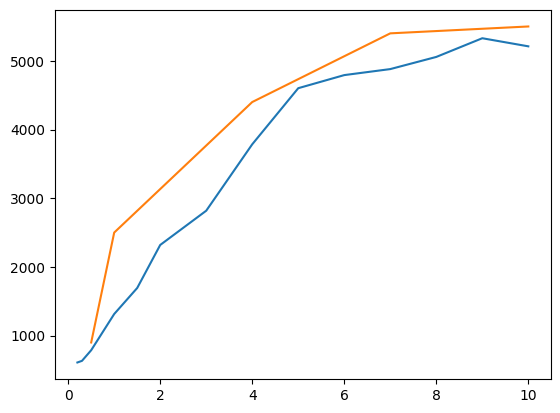

TypeScript - 868 responses (2021)
TypeScript - 719 responses (2022)


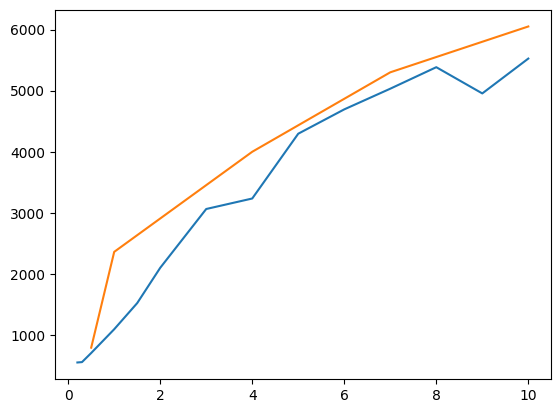

PHP - 867 responses (2021)
PHP - 538 responses (2022)


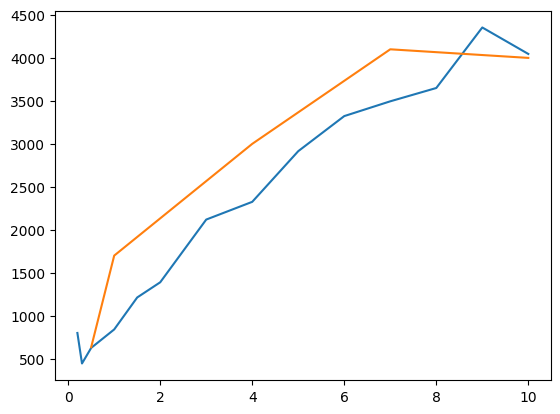

Python - 481 responses (2021)
Python - 395 responses (2022)


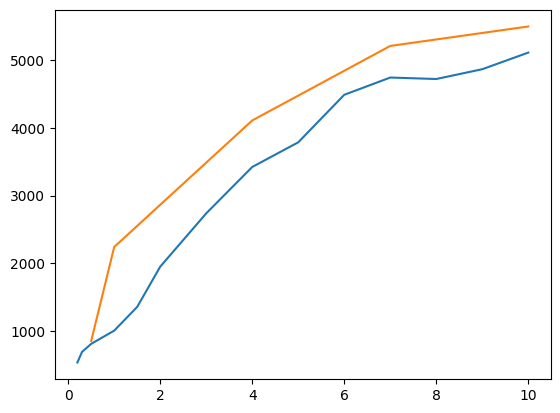

Kotlin - 287 responses (2021)
Kotlin - 254 responses (2022)
Swift - 284 responses (2021)
Swift - 226 responses (2022)
C++ - 274 responses (2021)
C++ - 201 responses (2022)
Ruby - 167 responses (2021)
Ruby - 163 responses (2022)
Go - 151 responses (2021)
Dart - 86 responses (2021)
C - 78 responses (2021)
C - 60 responses (2022)
Scala - 66 responses (2021)
1С - 56 responses (2021)
Salesforce Apex - 53 responses (2021)
SQL - 46 responses (2021)
Інша мова - 34 responses (2021)
Мови розробки БД (PL/SQL, Transact-SQL) - 23 responses (2021)
Objective-C - 18 responses (2021)
Objective-C - 8 responses (2022)
Rust - 17 responses (2021)
Elixir - 11 responses (2021)
Не можу обрати одну основну мову - 10 responses (2021)
Clojure - 10 responses (2021)
Clojure - 6 responses (2022)
Erlang - 8 responses (2021)
ABAP - 7 responses (2021)
Pascal/Delphi - 7 responses (2021)
Perl - 5 responses (2021)
Groovy - 5 responses (2021)
APL - 4 responses (2021)
Haskell - 3 responses (2021)


In [43]:
sort_by_criteria_both("Основна мова програмування", "tech", 300)

## Graphs: Comparison - percentile

### Setup

In [44]:
def undet(index):
    if index <= 0.5:
        return 0.5
    elif index <= 3:
        return 1
    elif index <= 6:
        return 4
    elif index < 10:
        return 7
    return 10

In [45]:
def percentages_by_criteria_both(criteria1, criteria2, threshold=None):
    index_2021 = [0.2, 0.3, 0.5, 1, 1.5] + list(range(2, 11))
    index_names_2021 = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median().sort_values().index
    index_dict_2021 = dict(zip(index_names_2021, index_2021))
    dec_2021_devs['experience'] = dec_2021_devs['Загальний стаж роботи в ІТ'].apply(lambda x: undet(index_dict_2021.get(x, x)))

    index_names_2021 = dec_2021_devs.groupby('Загальний стаж роботи в ІТ')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median().sort_values().index
    index_2022 = [0.5, 1, 4, 7, 10]
    index_names_2022 = june_2022.dropna(subset=[criteria2]).groupby('experience')['salary'].median().sort_values().index
    index_dict_2022 = dict(zip(index_names_2022, index_2022))



    for key in sorted(dec_2021_devs[criteria1].unique(), reverse=True, key=lambda key: sum(dec_2021_devs[criteria1] == key)):
        data_2021 = dec_2021_devs[dec_2021_devs[criteria1] == key].groupby('experience')['Зарплата у $$$ за місяць, лише ставка після сплати податків'].median()
        data_2022 = june_2022[june_2022[criteria2] == key].groupby('experience')['salary'].median()

        n_2021 = sum(dec_2021_devs[criteria1] == key)
        if n_2021 != 0:
            print(f"{key} - {n_2021} responses (2021)")

        n_2022 = sum(june_2022[criteria2] == key)
        if n_2022 != 0:
            print(f"{key} - {n_2022} responses (2022)")

        if threshold is None or (n_2021 > threshold and n_2022 > threshold):
            sub = plt.subplot()

            sorted_index_2021 = sorted(data_2021.index)

            salaries = []
            for x in sorted_index_2021:
                salary_2021 = data_2021[x]
                salary_2022 = data_2022[dict(map(tuple, map(reversed, index_dict_2022.items())))[x]]
                salaries.append(salary_2022 / salary_2021 * 100 - 100)
            sub.plot(sorted_index_2021, salaries)
            plt.show()

### Language

JavaScript - 1541 responses (2021)
JavaScript - 1032 responses (2022)


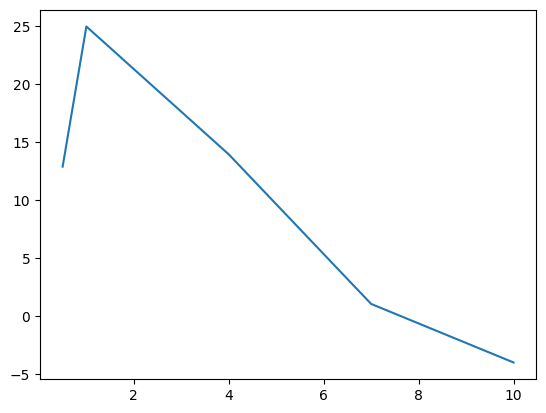

C# / .NET - 1225 responses (2021)
Java - 1191 responses (2021)
Java - 832 responses (2022)


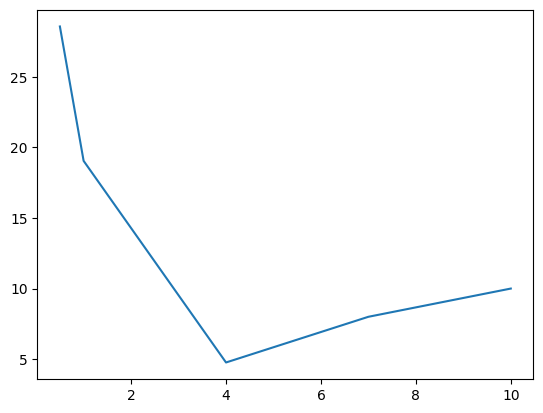

TypeScript - 868 responses (2021)
TypeScript - 719 responses (2022)


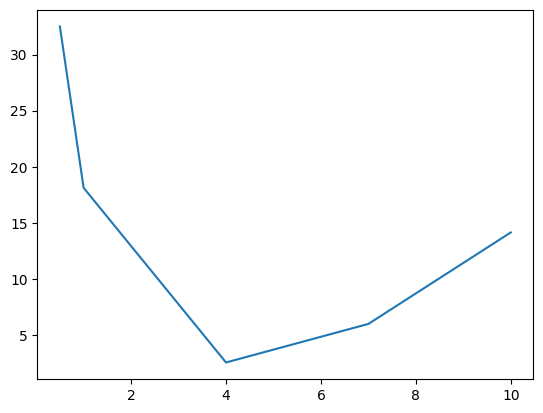

PHP - 867 responses (2021)
PHP - 538 responses (2022)


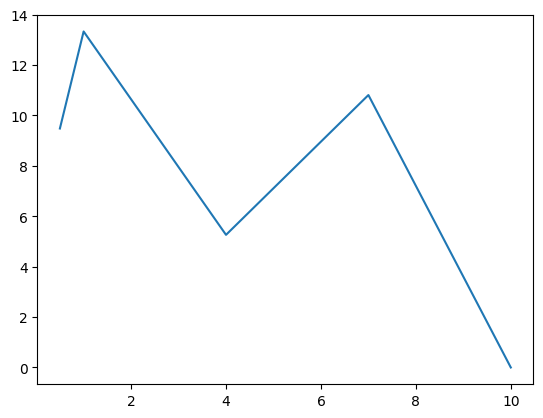

Python - 481 responses (2021)
Python - 395 responses (2022)


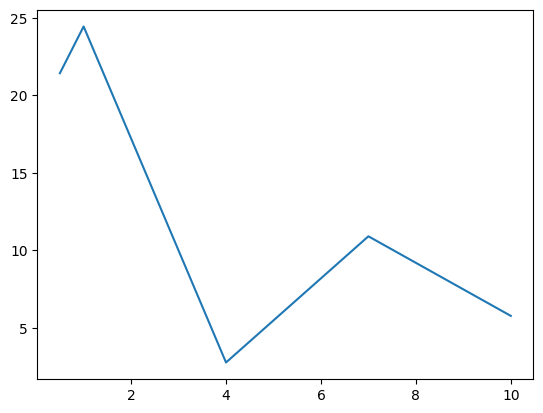

Kotlin - 287 responses (2021)
Kotlin - 254 responses (2022)
Swift - 284 responses (2021)
Swift - 226 responses (2022)
C++ - 274 responses (2021)
C++ - 201 responses (2022)
Ruby - 167 responses (2021)
Ruby - 163 responses (2022)
Go - 151 responses (2021)
Dart - 86 responses (2021)
C - 78 responses (2021)
C - 60 responses (2022)
Scala - 66 responses (2021)
1С - 56 responses (2021)
Salesforce Apex - 53 responses (2021)
SQL - 46 responses (2021)
Інша мова - 34 responses (2021)
Мови розробки БД (PL/SQL, Transact-SQL) - 23 responses (2021)
Objective-C - 18 responses (2021)
Objective-C - 8 responses (2022)
Rust - 17 responses (2021)
Elixir - 11 responses (2021)
Не можу обрати одну основну мову - 10 responses (2021)
Clojure - 10 responses (2021)
Clojure - 6 responses (2022)
Erlang - 8 responses (2021)
ABAP - 7 responses (2021)
Pascal/Delphi - 7 responses (2021)
Perl - 5 responses (2021)
Groovy - 5 responses (2021)
APL - 4 responses (2021)
Haskell - 3 responses (2021)


In [46]:
percentages_by_criteria_both("Основна мова програмування", "tech", 300)

### Location

Київ - 3376 responses (2021)
Київ - 1395 responses (2022)


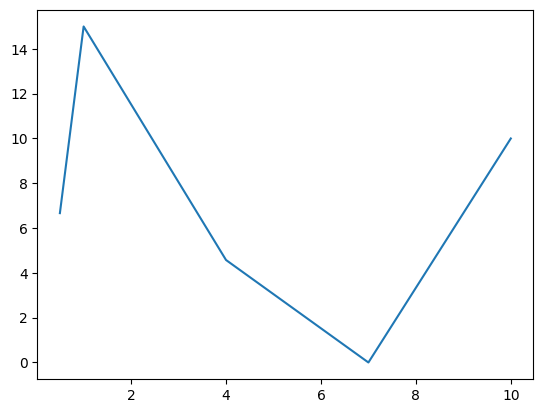

Львів - 1133 responses (2021)
Львів - 1152 responses (2022)


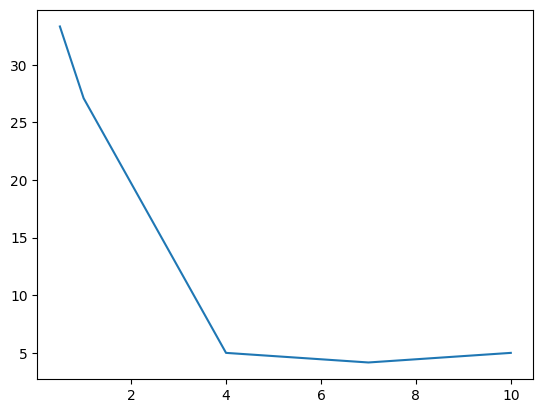

Харків - 1039 responses (2021)
Харків - 144 responses (2022)
Дніпро - 449 responses (2021)
Дніпро - 334 responses (2022)


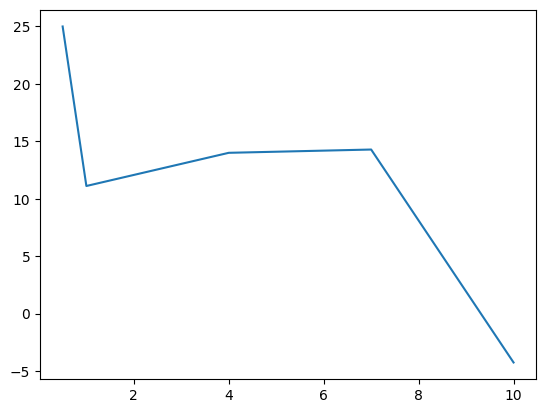

Одеса - 410 responses (2021)
Одеса - 227 responses (2022)
Вінниця - 233 responses (2021)
Вінниця - 322 responses (2022)
Інше - 218 responses (2021)
Інше - 1895 responses (2022)
Івано-Франківськ - 163 responses (2021)
Івано-Франківськ - 332 responses (2022)
Запоріжжя - 105 responses (2021)
Чернівці - 103 responses (2021)
Тернопіль - 88 responses (2021)
Черкаси - 79 responses (2021)
Хмельницький - 76 responses (2021)
Миколаїв - 74 responses (2021)
Рівне - 60 responses (2021)
Полтава - 54 responses (2021)
Житомир - 53 responses (2021)
Суми - 50 responses (2021)
Чернігів - 49 responses (2021)
Луцьк - 46 responses (2021)
Ужгород - 41 responses (2021)
Херсон - 35 responses (2021)
Кропивницький - 33 responses (2021)
Кривий Ріг - 20 responses (2021)
Маріуполь - 18 responses (2021)


In [47]:
percentages_by_criteria_both('Де ви мешкаєте?', "city", 300)

# Stack overflow survey analysis

## Setup

In [48]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [49]:
import pandas as pd
import matplotlib.pyplot as plt

In [50]:
dataset = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv', delimiter=',')

## Graphs setup

In [51]:
converter = {
    "More than 50 years": 51,
    "Less than 1 year": 0.5,
}

def summarize_salary_per_experience(dataset):
    data = dataset.dropna(subset=['ConvertedCompYearly']).groupby('YearsCode')['ConvertedCompYearly']

    devs_per_years = []
    index = sorted(dataset['YearsCode'].dropna().unique(), key=lambda x: float(converter.get(x, x)))
    for x in index:
        y = dataset[dataset["YearsCode"] == x]["ConvertedCompYearly"].dropna().shape[0]
        devs_per_years.append(y)

    print("Developers per year of experience")
    plt.plot([converter.get(x, x) for x in index], devs_per_years)
    plt.show()

    print("Salary per year of experience")
    data = data.median()
    plt.plot([converter.get(x, x) for x in data.index], data)
    plt.show()

In [52]:
def lower_res(years):
    i = float(converter.get(years, years))
    if i <= 10:
        return i
    return 11


def crop_dataset(dataset):
    dataset_cropped = dataset.dropna(subset=["YearsCode"])
    dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)
    dataset_cropped = dataset_cropped[dataset_cropped["YearsCode - Less detailed"] < 11]
    return dataset_cropped

In [53]:
def build_graph(sub: plt.subplot, dataset_cropped, label=None):
    print(label, "-", dataset_cropped.shape[0], "responses")

    devs_per_years = []
    index = sorted(dataset_cropped['YearsCode - Less detailed'].dropna().unique())
    for x in index:
        y = dataset_cropped[dataset_cropped["YearsCode - Less detailed"] == x]["ConvertedCompYearly"].dropna().median()
        devs_per_years.append(y)

    sub.plot([converter.get(x, x) for x in index], devs_per_years, label=label)

In [54]:
def filter_by_language(dataset, language):
    bool_index = dataset["LanguageHaveWorkedWith"].str.contains(language, regex=False)
    na_index = bool_index.notna()
    return dataset[na_index][bool_index.dropna()]

def n_devs(dataset, language):
    return sum(dataset["LanguageHaveWorkedWith"].str.contains(language, regex=False).dropna())

def get_most_popular_languages(dataset):
    languages = set().union(*(set(x.split(";")) for x in dataset["LanguageHaveWorkedWith"].dropna().unique()))
    return sorted(languages, key=lambda language: n_devs(dataset, language), reverse=True)

## Comparison

### Load the dataset

In [55]:
dataset_2022 = pd.read_csv('./stack-overflow-developer-survey-2022/survey_results_public.csv', delimiter=',')
dataset_2021 = pd.read_csv('./stack-overflow-developer-survey-2021/survey_results_public.csv', delimiter=',')

### Absolute comparison graphs

/tmp/ipykernel_227696/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)
/tmp/ipykernel_227696/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)


C
2022 - 31347 responses
2021 - 35724 responses


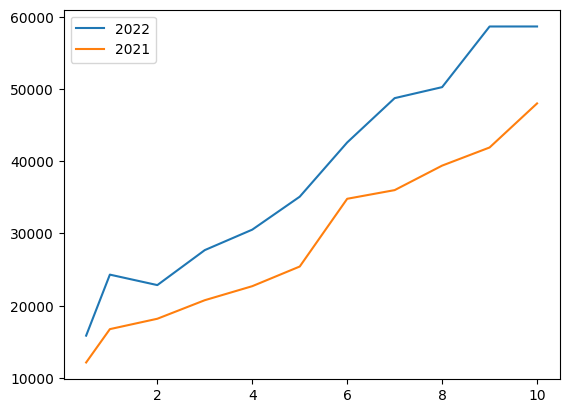

Java
2022 - 31411 responses
2021 - 35184 responses


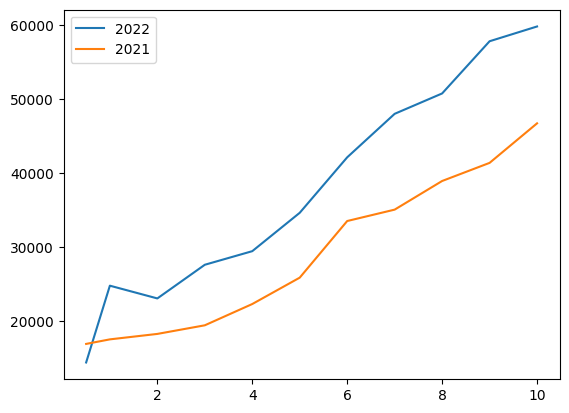

JavaScript
2022 - 27268 responses
2021 - 29984 responses


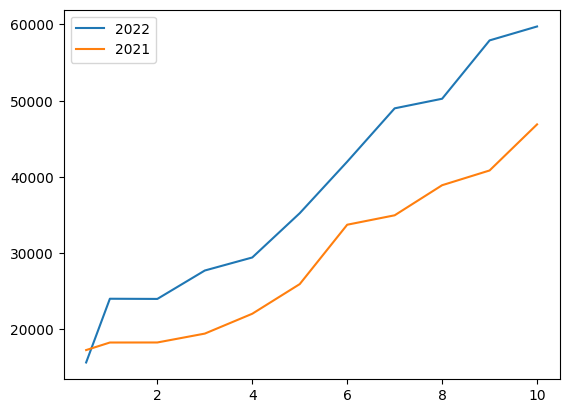

HTML/CSS
2022 - 23765 responses
2021 - 26869 responses


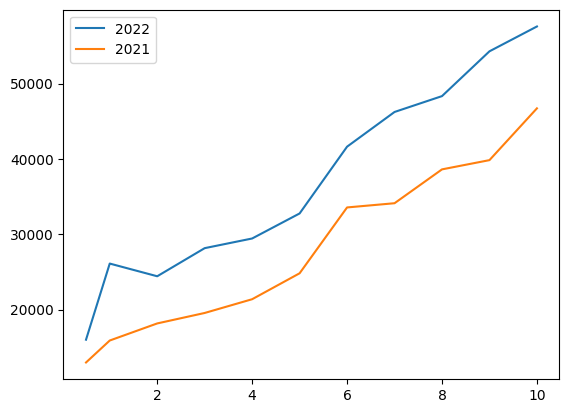

SQL
2022 - 18656 responses
2021 - 20028 responses


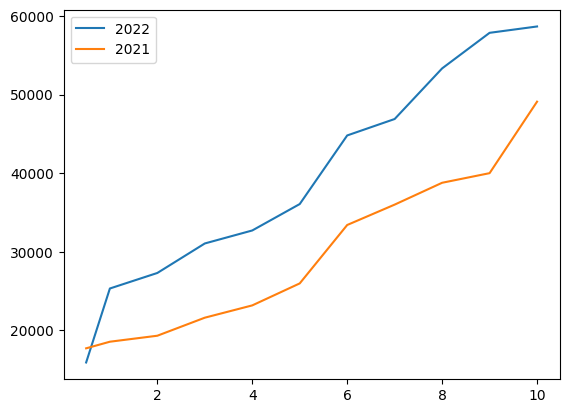

Python
2022 - 21453 responses
2021 - 24436 responses


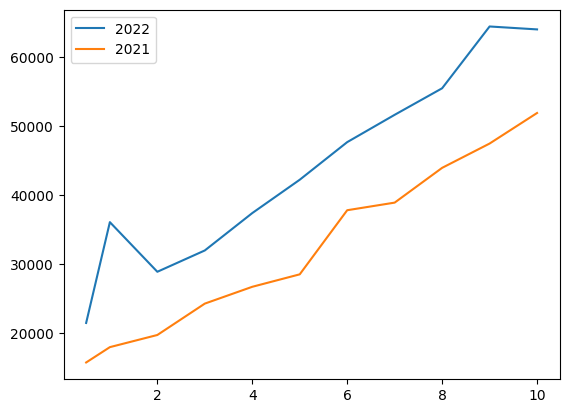

TypeScript
2022 - 13968 responses
2021 - 13004 responses


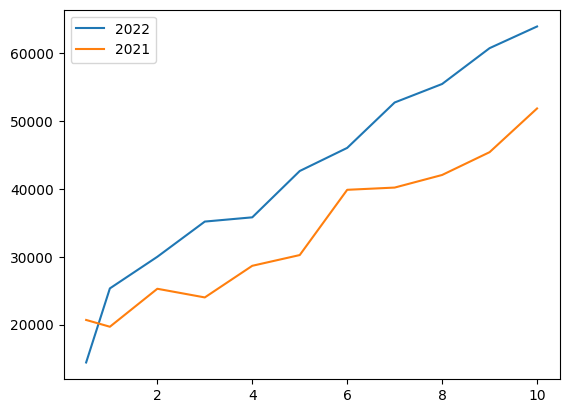

Bash/Shell
2022 - 10087 responses
2021 - 10368 responses


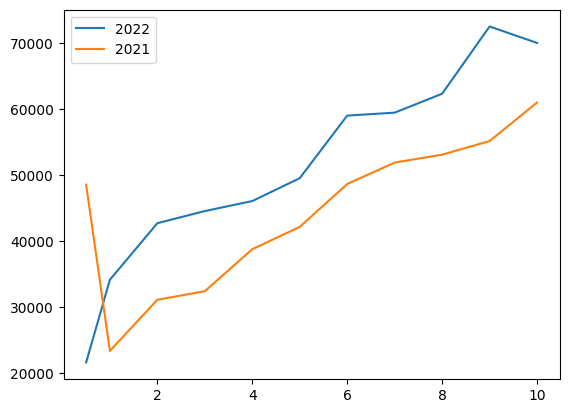

C#
2022 - 10275 responses
2021 - 11593 responses


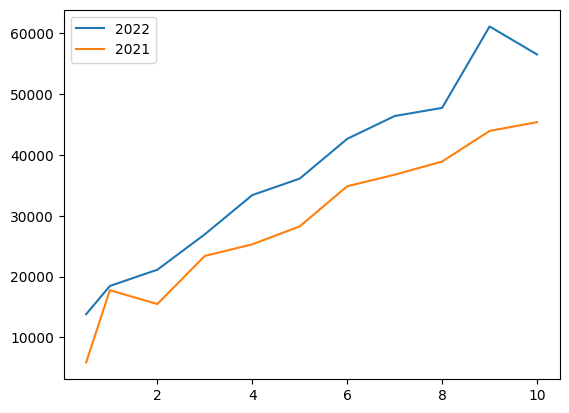

C++
2022 - 9951 responses
2021 - 12298 responses


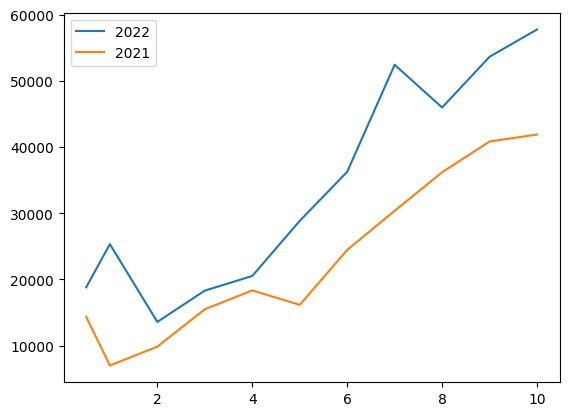

In [56]:
cropped_2022 = crop_dataset(dataset_2022)
cropped_2021 = crop_dataset(dataset_2021)
for language in get_most_popular_languages(dataset)[:10]:
    print(language)
    sub = plt.subplot()
    build_graph(sub, filter_by_language(cropped_2022, language), "2022")
    build_graph(sub, filter_by_language(cropped_2021, language), "2021")
    plt.legend(loc="upper left")
    plt.show()

### Percentile comparison graphs

/tmp/ipykernel_227696/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)
/tmp/ipykernel_227696/87522081.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset_cropped["YearsCode - Less detailed"] = dataset_cropped["YearsCode"].apply(lower_res)


C
35724
31347


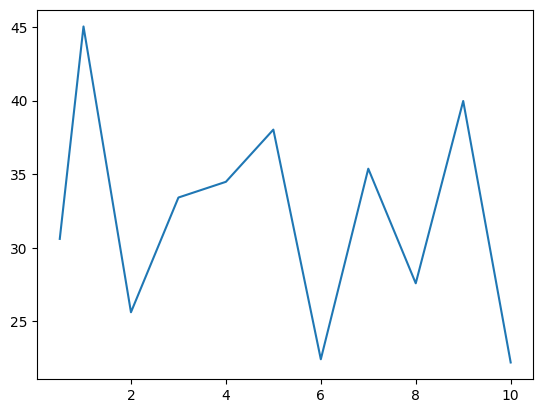

Java
35184
31411


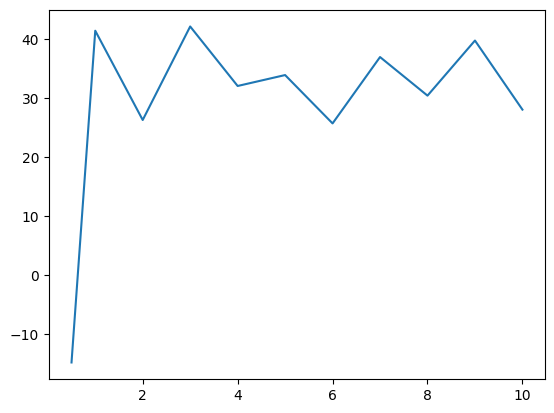

JavaScript
29984
27268


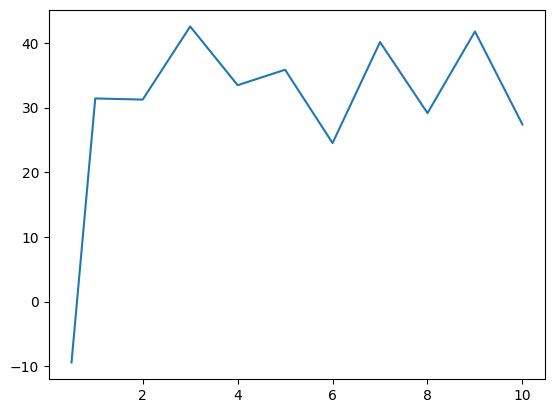

HTML/CSS
26869
23765


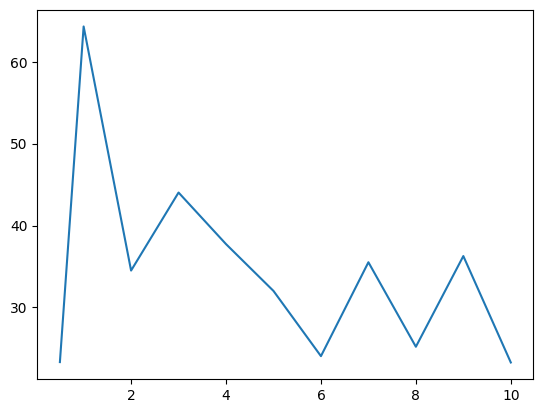

SQL
20028
18656


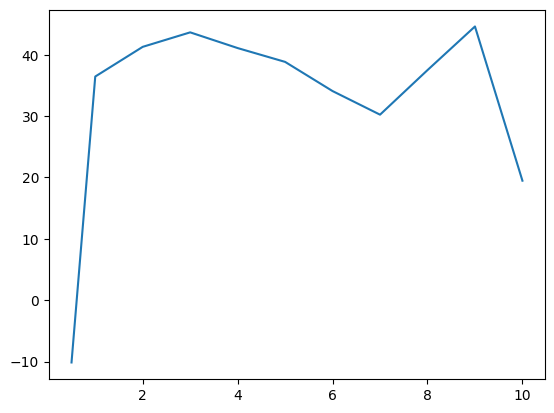

Python
24436
21453


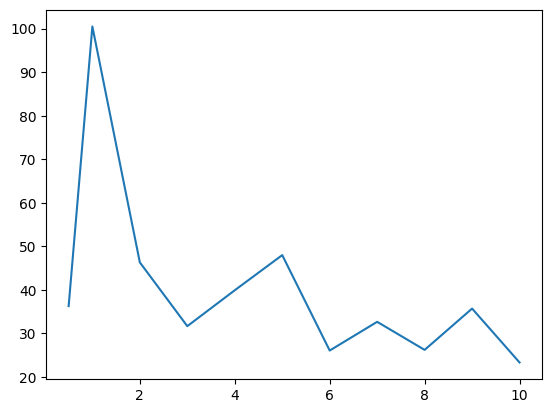

TypeScript
13004
13968


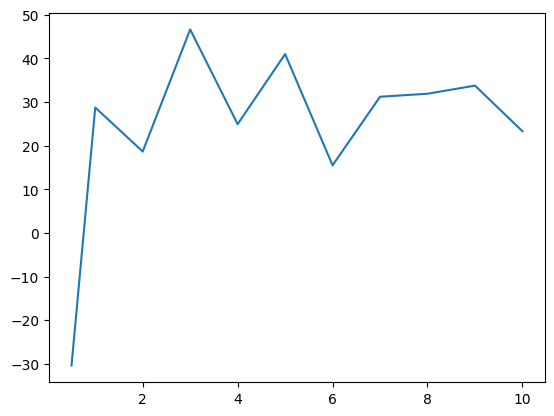

Bash/Shell
10368
10087


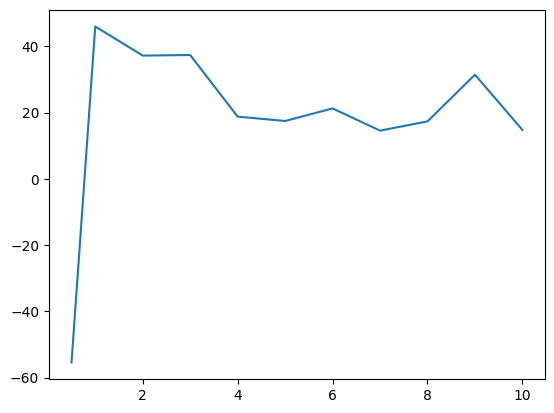

C#
11593
10275


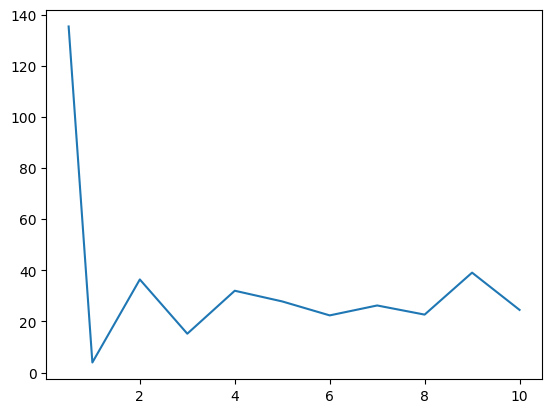

C++
12298
9951


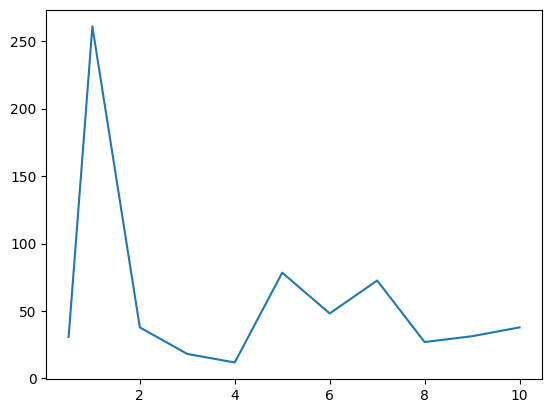

In [57]:
cropped_2022 = crop_dataset(dataset_2022)
cropped_2021 = crop_dataset(dataset_2021)
index = sorted(cropped_2021["YearsCode - Less detailed"].unique())
for language in get_most_popular_languages(dataset)[:10]:
    print(language)
    sub = plt.subplot()
    language_2022 = filter_by_language(cropped_2022, language)
    language_2021 = filter_by_language(cropped_2021, language)
    print(language_2021.shape[0])
    print(language_2022.shape[0])
    salaries = []
    for experience in index:
        salary_2021 = language_2021[language_2021["YearsCode - Less detailed"] == experience]['ConvertedCompYearly'].median()
        salary_2022 = language_2022[language_2022["YearsCode - Less detailed"] == experience]['ConvertedCompYearly'].median()
        salaries.append(salary_2022 / salary_2021 * 100 - 100)
    sub.plot(index, salaries)
    plt.show()